In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the datasets
results = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\results.csv', parse_dates=True)
rankings = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\fifa_ranking.csv', parse_dates=True)

In [3]:
# Previewing the datasets

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
# Dropping unnecessary columns

results.drop(['city', 'country', 'neutral'], axis=1, inplace=True)

In [5]:
# Selecting only useful columns in the rankings dataset

ranks = rankings[['rank', 'rank_date', 'country_full']]

In [6]:
ranks.head()

,rank,rank_date,country_full
0,1,1993-08-08,Germany
1,2,1993-08-08,Italy
2,3,1993-08-08,Switzerland
3,4,1993-08-08,Sweden
4,5,1993-08-08,Argentina


In [7]:
# Checking for null values

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [8]:
# Checking for duplicates and dropping them

results.duplicated().sum()

1

In [9]:
results.drop_duplicates(inplace=True)

In [10]:
# Modifying date column into appropriate datetime column

results['date'] = pd.to_datetime(results['date'])

In [11]:
ranks.isnull().sum()

rank            0
rank_date       0
country_full    0
dtype: int64

In [12]:
ranks.duplicated().sum()

38

In [13]:
ranks.drop_duplicates(inplace=True)

<ipython-input-13-603eab7e21f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranks.drop_duplicates(inplace=True)


In [14]:
ranks['rank_date'] = pd.to_datetime(ranks['rank_date'])

<ipython-input-14-a412c29851c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranks['rank_date'] = pd.to_datetime(ranks['rank_date'])


In [15]:
# for computational purposes, we shall work only on the data in 2018
ranks = ranks[(ranks['rank_date'] > '2017-12-31') & (ranks['rank_date'] < '2019') ]

In [16]:
ranks.head()

,rank,rank_date,country_full
56527,1,2018-01-18,Germany
56528,2,2018-01-18,Brazil
56529,3,2018-01-18,Portugal
56530,4,2018-01-18,Argentina
56531,5,2018-01-18,Belgium


In [17]:

# Slecting only the data within 2018 and therefore using only the 2018 ranking system.

results = results[(results['date'] >= '2018-01-18') & ( results['date'] <= '2018-06-07')]
results.head()

,date,home_team,away_team,home_score,away_score,tournament
39514,2018-01-18,Ivory Coast,Zambia,0,2,African Nations Championship
39515,2018-01-18,Uganda,Namibia,0,1,African Nations Championship
39516,2018-01-19,Libya,Nigeria,0,1,African Nations Championship
39517,2018-01-19,Rwanda,Equatorial Guinea,1,0,African Nations Championship
39518,2018-01-20,Angola,Cameroon,1,0,African Nations Championship


In [18]:
# checking the number of entries
results.shape

(320, 6)

In [19]:
ranks.shape

(1266, 3)

In [20]:
# Creating a status column indicating wins, draws and losses

results['status'] = results['home_score'] - results['away_score']
results.head()

,date,home_team,away_team,home_score,away_score,tournament,status
39514,2018-01-18,Ivory Coast,Zambia,0,2,African Nations Championship,-2
39515,2018-01-18,Uganda,Namibia,0,1,African Nations Championship,-1
39516,2018-01-19,Libya,Nigeria,0,1,African Nations Championship,-1
39517,2018-01-19,Rwanda,Equatorial Guinea,1,0,African Nations Championship,1
39518,2018-01-20,Angola,Cameroon,1,0,African Nations Championship,1


In [21]:
# Cleaning up the status column

for i in range(len(results)):
    
    if results.iloc[i, 6] > 0:
        results.iloc[i, 6] = 'W'
    
    elif results.iloc[i, 6] < 0:
        results.iloc[i, 6] = 'L'
    
    else:
        results.iloc[i, 6] = 'D'

In [22]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,status
39514,2018-01-18,Ivory Coast,Zambia,0,2,African Nations Championship,L
39515,2018-01-18,Uganda,Namibia,0,1,African Nations Championship,L
39516,2018-01-19,Libya,Nigeria,0,1,African Nations Championship,L
39517,2018-01-19,Rwanda,Equatorial Guinea,1,0,African Nations Championship,W
39518,2018-01-20,Angola,Cameroon,1,0,African Nations Championship,W


In [23]:
# Creating a backup copy

backup = results.copy()

In [24]:
# Creating a function that extracts ranks from the ranks dataset and matches the teams in the results dataset.

In [25]:
def ranker(dfranks, dfresults):
    
    # creating empty columns for home rank and away rank
    dfresults['home_rank'] = ""
    dfresults['away_rank'] = ""
    
    # matching home countries and assigning their ranks
    for pos, home in enumerate(dfresults.loc[:, 'home_team']):
        for place, country in enumerate(dfranks.loc[:, 'country_full']):
            
        
                
                if home == country:
                    dfresults.iloc[pos, 7] = dfranks.iloc[place, 0]
    
    # matching away countries and assigning their ranks
    for pos, home in enumerate(dfresults.loc[:, 'away_team']):
        for place, country in enumerate(dfranks.loc[:, 'country_full']):
            
            
                if home == country:
                    dfresults.iloc[pos, 8] = dfranks.iloc[place, 0]

    
    return dfresults.head()

In [26]:
ranker(ranks, results)

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
39514,2018-01-18,Ivory Coast,Zambia,0,2,African Nations Championship,L,,76
39515,2018-01-18,Uganda,Namibia,0,1,African Nations Championship,L,82,116
39516,2018-01-19,Libya,Nigeria,0,1,African Nations Championship,L,101,48
39517,2018-01-19,Rwanda,Equatorial Guinea,1,0,African Nations Championship,W,136,143
39518,2018-01-20,Angola,Cameroon,1,0,African Nations Championship,W,137,49


In [27]:
results.shape

(320, 9)

In [28]:
# Some teams were not ranked leading to blank entries. They are soon dropped below.

In [29]:
results = results[(results['home_rank'] != '') & (results['away_rank'] != '')]

In [30]:
# Univariate analysis

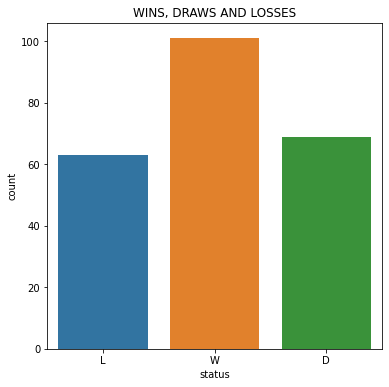

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x = results['status'])
plt.title('WINS, DRAWS AND LOSSES')
plt.show()

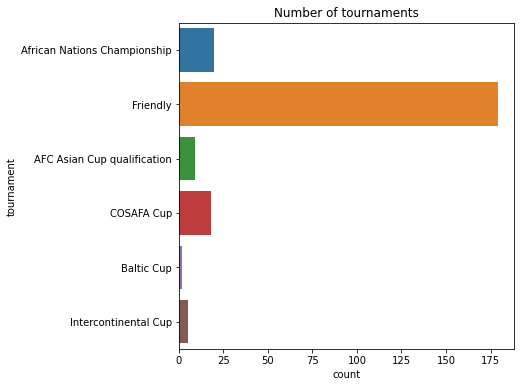

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(y = results['tournament'])
plt.title('Number of tournaments')
plt.show()

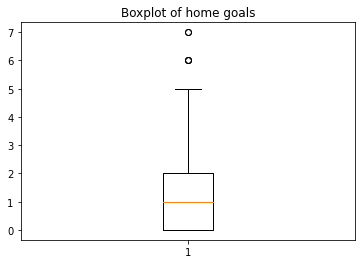

In [33]:
plt.boxplot(results['home_score'])
plt.title('Boxplot of home goals')
plt.show()

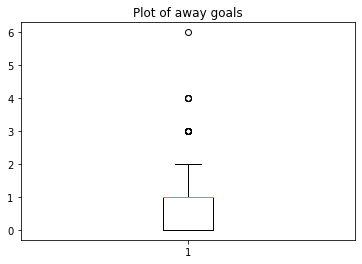

In [34]:
plt.boxplot(results['away_score'])
plt.title('Plot of away goals')
plt.show()

In [35]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 39515 to 39826
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        233 non-null    datetime64[ns]
 1   home_team   233 non-null    object        
 2   away_team   233 non-null    object        
 3   home_score  233 non-null    int64         
 4   away_score  233 non-null    int64         
 5   tournament  233 non-null    object        
 6   status      233 non-null    object        
 7   home_rank   233 non-null    object        
 8   away_rank   233 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 28.2+ KB


In [36]:
results['home_rank'] = results['home_rank'].astype(int)

In [37]:
results['away_rank'] = results['away_rank'].astype(int)

In [38]:
results.describe()

,home_score,away_score,home_rank,away_rank
count,233.000000,233.000000,233.000000,233.000000
mean,1.377682,0.931330,79.171674,84.733906
std,1.418419,1.044075,50.513191,54.175620
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,35.000000,42.000000
50%,1.000000,1.000000,79.000000,76.000000
75%,2.000000,1.000000,117.000000,126.000000
max,7.000000,6.000000,195.000000,206.000000


In [39]:
# Bivariate analysis

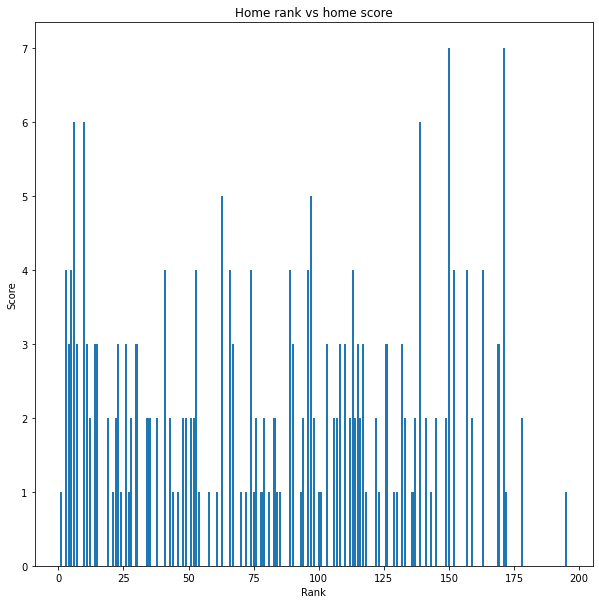

In [40]:
plt.figure(figsize=(10, 10))
plt.bar(results['home_rank'], results['home_score'])
plt.title('Home rank vs home score')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

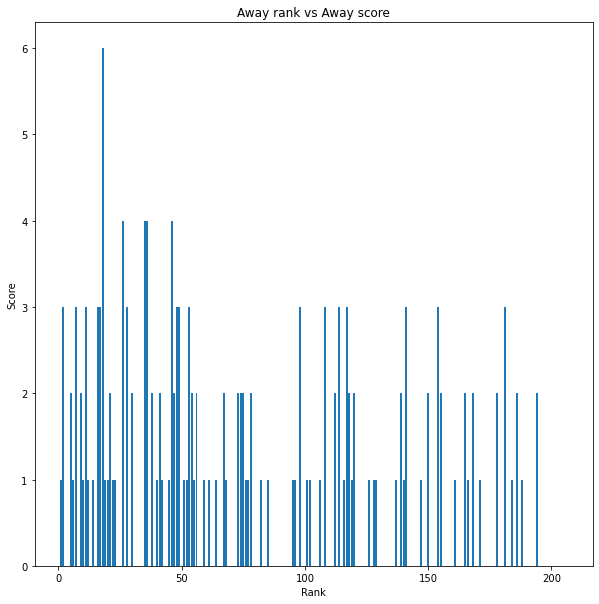

In [41]:
plt.figure(figsize=(10, 10))
plt.bar(results['away_rank'], results['away_score'])
plt.title('Away rank vs Away score')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

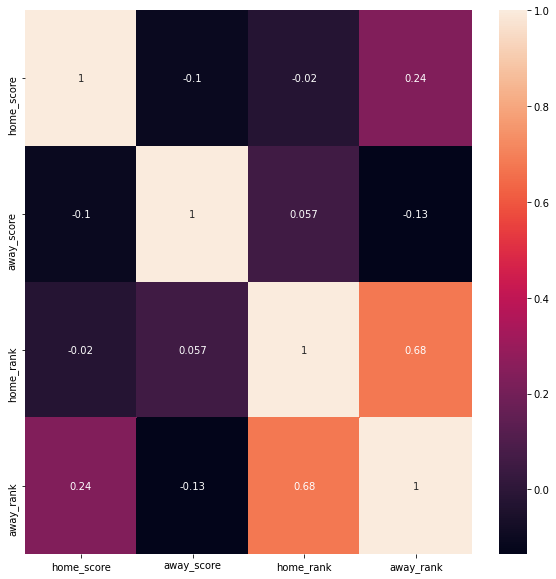

In [42]:
# heatmap of correlation

plt.figure(figsize=(10,10))
sns.heatmap(results.corr(), annot=True)
plt.show()

In [43]:
# The above plots show curious things:

In [44]:
# Logisitic regression and hyperparameter tuning.

results.shape

(233, 9)

In [45]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
39515,2018-01-18,Uganda,Namibia,0,1,African Nations Championship,L,82,116
39516,2018-01-19,Libya,Nigeria,0,1,African Nations Championship,L,101,48
39517,2018-01-19,Rwanda,Equatorial Guinea,1,0,African Nations Championship,W,136,143
39518,2018-01-20,Angola,Cameroon,1,0,African Nations Championship,W,137,49
39519,2018-01-20,Congo,Burkina Faso,2,0,African Nations Championship,W,83,52


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
results['tournament'] = le.fit_transform(results['tournament'])

results['home_team'] = le.fit_transform(results['home_team'])
results['away_team'] = le.fit_transform(results['away_team'])

In [47]:
results['status'] = results['status'].map({'L' : 1, 'W': 2, 'D': 0})

In [48]:
results['year'] = results['date'].dt.year
results.head()

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank,year
39515,2018-01-18,112,74,0,1,1,1,82,116,2018
39516,2018-01-19,64,79,0,1,1,1,101,48,2018
39517,2018-01-19,94,32,1,0,1,2,136,143,2018
39518,2018-01-20,4,18,1,0,1,2,137,49,2018
39519,2018-01-20,27,16,2,0,1,2,83,52,2018


In [49]:
# Features and the labels
X = results.drop(['date', 'status', 'home_score', 'away_score'], axis=1).values
y = results['status'].values

In [50]:
# splitting the trainig and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

In [51]:
print(X_train.shape, y_train.shape)

(186, 6) (186,)


In [52]:
print(X_test.shape, y_test.shape)

(47, 6) (47,)


In [53]:
# Importing the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=-1)

In [54]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [55]:
# Making predictions

y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1,  5,  9],
       [ 1,  5,  7],
       [ 2,  3, 14]], dtype=int64)

In [57]:
print("Accuracy :" +str(accuracy_score(y_test, y_pred)))

Accuracy :0.425531914893617


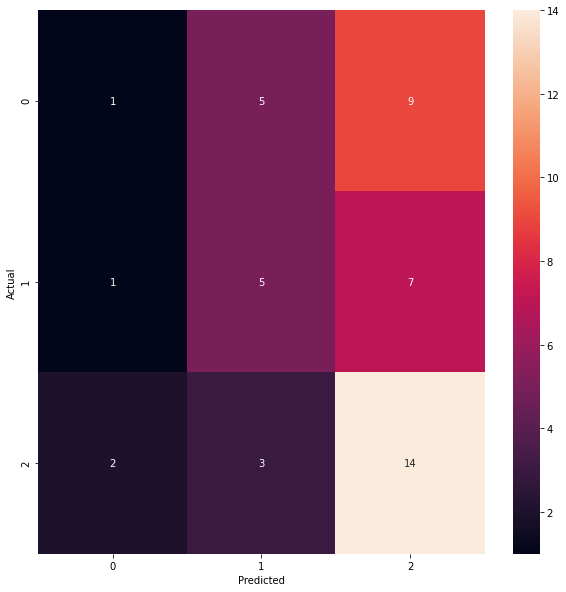

In [58]:
# Plotting a heatmap to show the confusion matrix in a better way

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    param_grid = {
        'C' : [10, 20, 50, 75, 100, 200]
    },
    estimator = model,
    cv = 5,
    return_train_score=False
)


In [60]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [10, 20, 50, 75, 100, 200]})

In [61]:
df = pd.DataFrame(clf.cv_results_)
df = df[['param_C', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [62]:
# A dataframe of crossvalidated scores with each C parameter tested
df

,param_C,mean_test_score
1,20,0.516927
5,200,0.516927
2,50,0.511522
3,75,0.511522
4,100,0.511522
0,10,0.500711


In [63]:
clf.best_estimator_

LogisticRegression(C=20, n_jobs=-1)

In [64]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(n_jobs=-1, C=200)

In [65]:
logr.fit(X_train, y_train)

LogisticRegression(C=200, n_jobs=-1)

In [66]:
y_pred = logr.predict(X_test)

In [67]:
logr.score(X_test, y_test)

0.46808510638297873

In [68]:
# Building a model to predict the home goals scored

results.sample()

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank,year
39767,2018-06-02,57,78,2,1,5,2,112,120,2018


In [69]:
X = results.drop(['date', 'home_score', 'status', 'year'], axis=1).values
y = results['home_score'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=-1)

In [72]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [73]:
y_pred = model.predict(X_test)

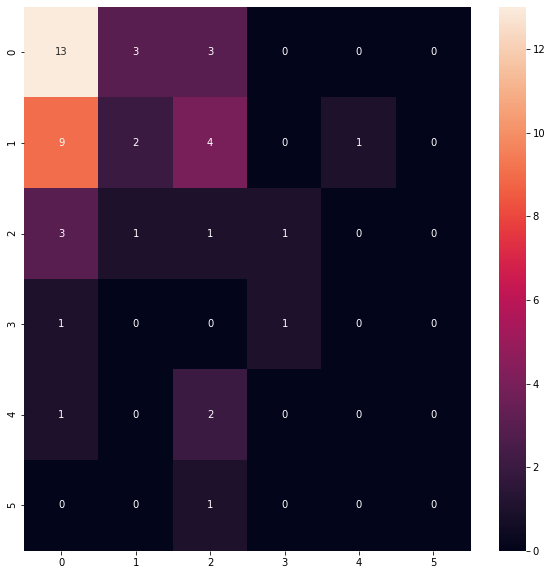

In [74]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

In [75]:
model.score(X_test, y_test)

0.3617021276595745

In [76]:
# Using grid search to find the best parameters

clf.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [10, 20, 50, 75, 100, 200]})

In [77]:
clf.best_estimator_

LogisticRegression(C=75, n_jobs=-1)

In [78]:
clf.best_score_

0.30625889046941684

In [79]:
# Using a different C parameter other than the one that defaulted to is inaccurate



In [80]:
# Cross checking with cross_val_score

In [81]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator= model, X=X_train, y=y_train, cv=5)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [82]:
accuracies.mean()

0.295448079658606

In [83]:
# Building a model that predicts the home score produces a low accuracy model that cannot be trusted as reliable.